In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

Data Preparation

In [2]:
#List of column names provided
col_names="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

#Appending new column named 'target'
columns=[]
for c in col_names.split(","):
    columns.append(c)

columns.append('target')
print(columns)    


['duration', '\nprotocol_type', '\nservice', '\nflag', '\nsrc_bytes', '\ndst_bytes', '\nland', '\nwrong_fragment', '\nurgent', '\nhot', '\nnum_failed_logins', '\nlogged_in', '\nnum_compromised', '\nroot_shell', '\nsu_attempted', '\nnum_root', '\nnum_file_creations', '\nnum_shells', '\nnum_access_files', '\nnum_outbound_cmds', '\nis_host_login', '\nis_guest_login', '\ncount', '\nsrv_count', '\nserror_rate', '\nsrv_serror_rate', '\nrerror_rate', '\nsrv_rerror_rate', '\nsame_srv_rate', '\ndiff_srv_rate', '\nsrv_diff_host_rate', '\ndst_host_count', '\ndst_host_srv_count', '\ndst_host_same_srv_rate', '\ndst_host_diff_srv_rate', '\ndst_host_same_src_port_rate', '\ndst_host_srv_diff_host_rate', '\ndst_host_serror_rate', '\ndst_host_srv_serror_rate', '\ndst_host_rerror_rate', '\ndst_host_srv_rerror_rate', 'target']


In [3]:
for i in range (0,len(columns)):
    if(columns[i].strip()):
        columns[i]=columns[i].strip()

print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']


In [4]:
print(len(columns))

42


In [5]:
#Reading the attack types file
with open("attack_types.txt",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


In [6]:
#Creating a dictionary of attack type
attack_types={
    'normal':'normal',
    'back':'dos',
    'buffer_overflow':'u2r',
    'ftp_write':'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l'
}

In [7]:
#Reading the dataset and adding the attack type feature, which has five distinct values (dos, normal, probing, r2l, u2r) to the training dataset.

df=pd.read_excel("kddcup_10_percent_rectified.xlsx", names=columns)
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,210,624,0,0,0,0,...,109,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal.


In [8]:
df['target'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [9]:
attack_types.values()

dict_values(['normal', 'dos', 'u2r', 'r2l', 'r2l', 'r2l', 'probe', 'dos', 'u2r', 'r2l', 'dos', 'probe', 'u2r', 'r2l', 'dos', 'probe', 'u2r', 'probe', 'dos', 'r2l', 'dos', 'r2l', 'r2l'])

In [10]:
#Adding the Attack Type column
df['Attack Type'] = df['target'].apply(lambda r:attack_types[r[:-1]])

In [11]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [12]:
df['Attack Type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [13]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.,normal
5,0,tcp,http,SF,212,1940,0,0,0,0,...,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.,normal
6,0,tcp,http,SF,159,4087,0,0,0,0,...,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.,normal
7,0,tcp,http,SF,210,151,0,0,0,0,...,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.,normal
8,0,tcp,http,SF,212,786,0,0,0,1,...,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.,normal
9,0,tcp,http,SF,210,624,0,0,0,0,...,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal.,normal


In [14]:
df.shape

(494020, 43)

In [15]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [16]:
#Checking for the number of null values in each column
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [18]:
#Identifying categorical columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [19]:
cat_cols = list(set(df.columns)-set(num_cols))
cat_cols

['service', 'flag', 'protocol_type', 'Attack Type', 'target']

Categorical Feature Distribution

In [20]:
def graph(feature):
    df[feature].value_counts().plot(color='purple')
    plt.grid()

Text(0.5, 1.0, 'Flag')

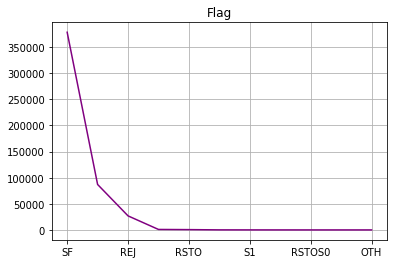

In [21]:
graph('flag')
plt.title("Flag")

Text(0.5, 1.0, 'Service')

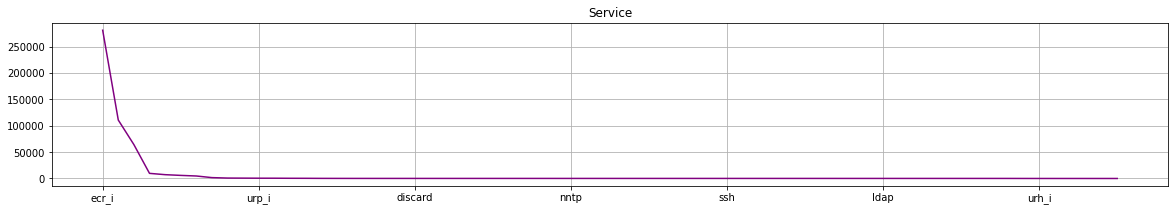

In [22]:
plt.figure(figsize=(20,3))
graph('service')
plt.title("Service")

Text(0.5, 1.0, 'Protocol Type')

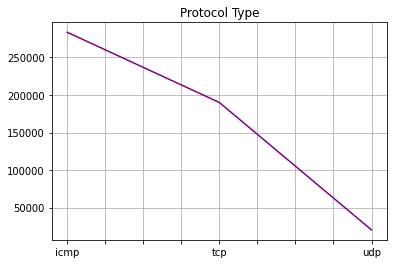

In [23]:
graph('protocol_type')
plt.title("Protocol Type")

Target Feature Distribution

Text(0.5, 1.0, 'Target')

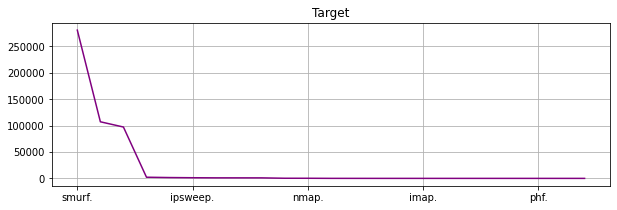

In [24]:
plt.figure(figsize=(10,3))
graph('target')
plt.title("Target")

Text(0.5, 1.0, 'Attack Type')

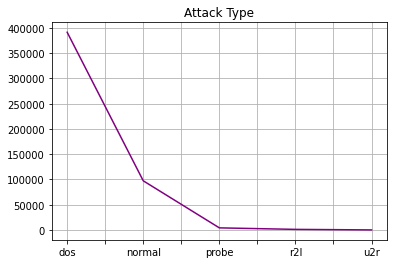

In [25]:
graph('Attack Type')
plt.title("Attack Type")

Data Correlation

In [26]:
#Identifying the highly correlated features
df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,0.010073,-0.117516,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004366,0.049330,0.047814,0.023298,...,-0.048868,-0.005849,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
urgent,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,...,-0.007139,-0.004541,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
hot,0.013213,0.004483,0.004366,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105306,0.007348,...,-0.026367,-0.038731,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,...,-0.025444,-0.015413,0.000507,0.001017,-0.009565,0.016001,-0.001945,-0.002453,0.024753,0.023584
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105306,-0.001145,1.000000,0.013612,...,-0.621023,0.119324,0.161068,-0.061150,-0.461556,0.140495,-0.190954,-0.191703,-0.090868,-0.087885
num_compromised,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,...,-0.008361,-0.004797,-0.002584,0.000359,-0.006715,0.000621,-0.001978,-0.001631,-0.000843,-0.000873


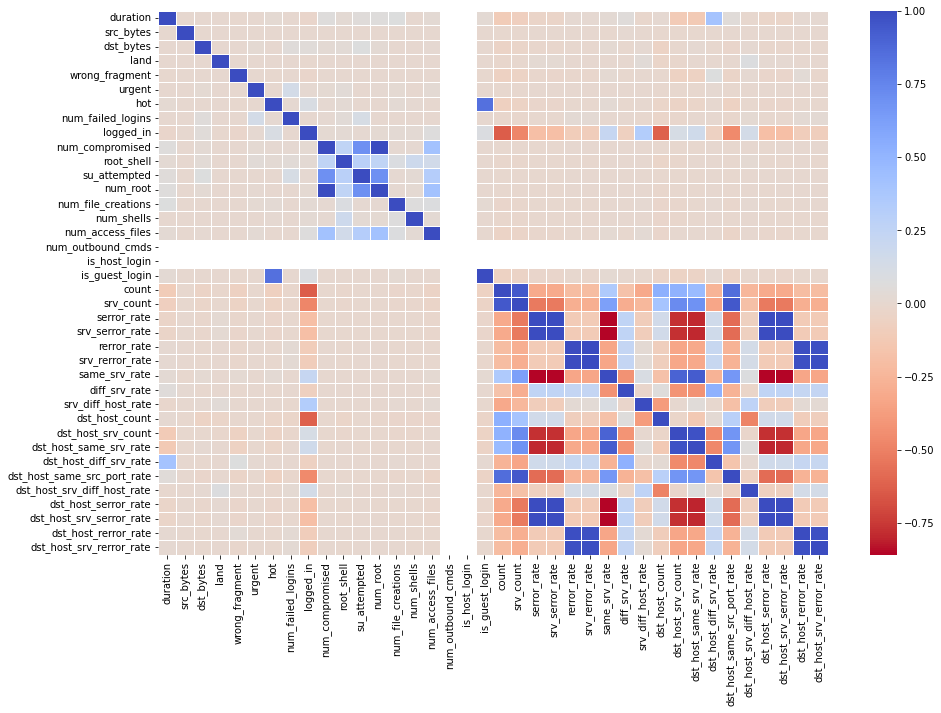

In [27]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,linewidths=0.5,cmap='coolwarm_r')
plt.show()

In [28]:
print(df['num_root'].corr(df['num_compromised']))
print(df['srv_serror_rate'].corr(df['serror_rate']))
print(df['srv_count'].corr(df['count']))
print(df['srv_rerror_rate'].corr(df['rerror_rate']))
print(df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count']))
print(df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate']))
print(df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate']))
print(df['dst_host_same_srv_rate'].corr(df['same_srv_rate']))
print(df['dst_host_srv_count'].corr(df['same_srv_rate']))
print(df['dst_host_same_src_port_rate'].corr(df['srv_count']))
print(df['dst_host_serror_rate'].corr(df['serror_rate']))
print(df['dst_host_serror_rate'].corr(df['srv_serror_rate']))
print(df['dst_host_srv_serror_rate'].corr(df['serror_rate']))
print(df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate']))
print(df['dst_host_rerror_rate'].corr(df['rerror_rate']))
print(df['dst_host_rerror_rate'].corr(df['srv_rerror_rate']))
print(df['dst_host_srv_rerror_rate'].corr(df['rerror_rate']))
print(df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate']))

0.9938277978733938
0.9983615065593687
0.9436669953129888
0.9947309533247114
0.9736906960847694
0.9981559165358191
0.9848038351835864
0.9278079908913704
0.8989593789529922
0.9449262532055139
0.9986729674316566
0.9978352994315264
0.997849247632945
0.9993041088827093
0.986994790866997
0.9821663404802504
0.985199552224188
0.9865705421991927


In [29]:
df.drop('num_root',axis=1,inplace=True)

df.drop('srv_serror_rate',axis=1,inplace=True)

df.drop('srv_rerror_rate',axis=1,inplace=True)

df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [30]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [31]:
df.shape

(494020, 35)

Converting categorical variables into numeric variables

In [32]:
cat_cols

['service', 'flag', 'protocol_type', 'Attack Type', 'target']

In [33]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

In [34]:
protocol_map={'icmp':0,'tcp':1, 'udp':2}
df['protocol_type']=df['protocol_type'].map(protocol_map)

In [35]:
df['flag'].value_counts()

SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [36]:
flag_map={'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag']=df['flag'].map(flag_map)

In [37]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [38]:
df=df.drop(['service'],axis=1)
print(df.shape)

(494020, 34)


In [39]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [40]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [41]:
df.shape

(494020, 34)

In [42]:
df1=df.drop('target',axis=1,inplace=True)

In [43]:
df1=pd.get_dummies(df)

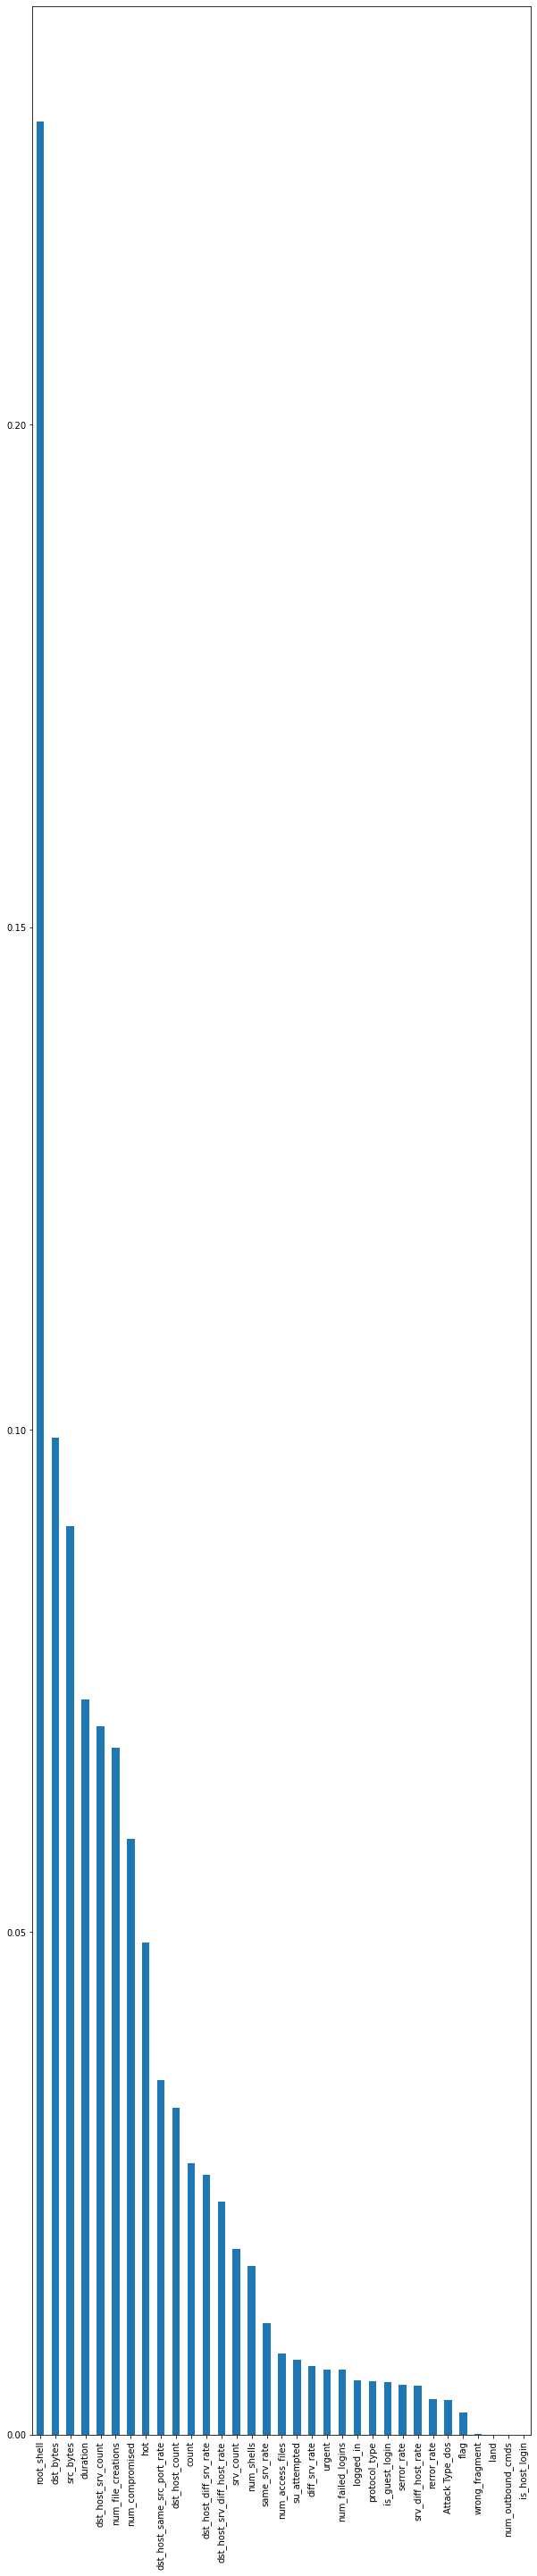

In [44]:
#Independent features
x = df1.iloc[:,0:33]  
#Dependent Feature
y = df1.iloc[:,-1]    

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

#Visualizing the important features
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.nlargest(len(df1.columns)).plot(kind='bar', figsize=(10,50))
plt.show()

In [45]:
df1.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type_dos', 'Attack Type_normal', 'Attack Type_probe',
       'Attack Type_r2l', 'Attack Type_u2r'],
      dtype='object')

In [46]:
df1.drop('Attack Type_dos',axis=1,inplace=True)
df1.drop('Attack Type_normal',axis=1,inplace=True)
df1.drop('Attack Type_probe',axis=1,inplace=True)
df1.drop('Attack Type_r2l',axis=1,inplace=True)
df1.drop('Attack Type_u2r',axis=1,inplace=True)

In [47]:
df1.shape

(494020, 32)

In [48]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type'],
      dtype='object')

In [49]:
#Removing irrelevant features
df.drop('land',axis=1,inplace=True)
df.drop('is_host_login',axis=1,inplace=True)
df.drop('num_outbound_cmds',axis=1,inplace=True)

In [50]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type'],
      dtype='object')

In [51]:
df.shape

(494020, 30)

Multilayer Perceptron Neural Network

In [52]:
#Importing required libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [53]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type'],
      dtype='object')

In [54]:
df['Attack Type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [55]:
#Label Encoding the Attack Type column (class label)
attack_map={'normal':0, 'u2r':1, 'dos':2, 'r2l':3, 'probe':4}
df['Attack Type']=df['Attack Type'].map(attack_map)

In [56]:
Y=df['Attack Type'].values
X=df.drop(['Attack Type'],axis=1).values

#Dividing the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(345814, 29) (148206, 29)
(345814,) (148206,)


In [57]:
#Normalizing the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim

#Converting from NumPy Array to torch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#Device configuration
def get_device():
    ''' Pick GPU if available, else CPU ''' 
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_device()

In [59]:
#Defining the hyperparameters
n_samples, n_features = X.shape

input_dim=n_features
''' As there are 5 unique attack types '''
num_class=5 

#Building the MLP
class MLP(nn.Module):
    def __init__(self, input_dim, num_class):
        super(MLP, self).__init__()
        self.L1 = nn.Linear(input_dim, 256)
        self.L2 = nn.Linear(256, 128)
        self.L3 = nn.Linear(128, 64)
        self.L4 = nn.Linear(64, num_class)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.L1(x))
        out = self.relu(self.L2(out))
        out = self.relu(self.L3(out))
        out = self.L4(out)
        return out   

model = MLP(input_dim, num_class).to(device)    

learning_rate = 0.001

#Loss and Optimizer construction
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam (model.parameters(), lr=learning_rate)


In [66]:
#Training Loop

num_epochs = 1000

loss_list = np.zeros(num_epochs)

def training_network(model, optimizer, criterion, X_train, y_train, X_test, y_test,
                    num_epochs):
    start_time= time.time()
    for epoch in range(num_epochs):
        '''Clear out the gradients from the last step'''
        optimizer.zero_grad()
        '''Forward Pass'''
        output_train = model(X_train)
        '''Calculate the loss '''
        loss = criterion(output_train, y_train)
        '''Backward Pass'''
        loss.backward()
        '''Updating the weights'''
        optimizer.step()


        loss_list[epoch] = loss.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
    end_time=time.time()
    print(end_time-start_time)
training_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs)

Epoch 50/1000, Loss: 0.0016
Epoch 100/1000, Loss: 0.0016
Epoch 150/1000, Loss: 0.0015
Epoch 200/1000, Loss: 0.0015
Epoch 250/1000, Loss: 0.0014
Epoch 300/1000, Loss: 0.0014
Epoch 350/1000, Loss: 0.0013
Epoch 400/1000, Loss: 0.0013
Epoch 450/1000, Loss: 0.0013
Epoch 500/1000, Loss: 0.0012
Epoch 550/1000, Loss: 0.0012
Epoch 600/1000, Loss: 0.0012
Epoch 650/1000, Loss: 0.0011
Epoch 700/1000, Loss: 0.0011
Epoch 750/1000, Loss: 0.0011
Epoch 800/1000, Loss: 0.0010
Epoch 850/1000, Loss: 0.0017
Epoch 900/1000, Loss: 0.0014
Epoch 950/1000, Loss: 0.0012
Epoch 1000/1000, Loss: 0.0011
2710.1075716018677


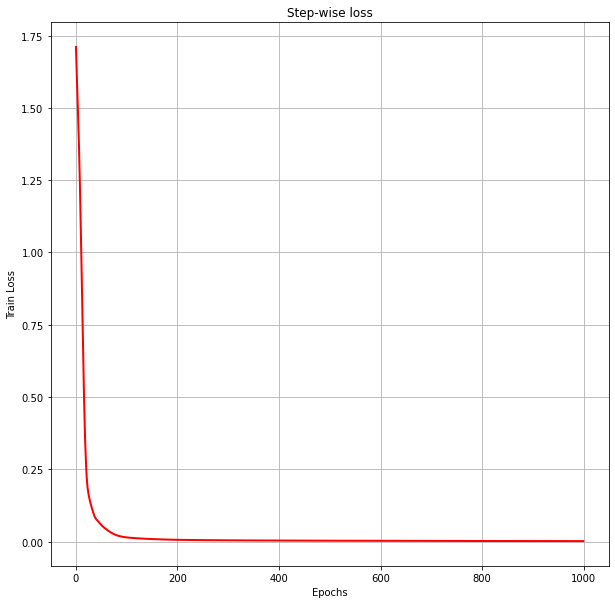

In [61]:
plt.figure(figsize=(10,10))
plt.plot(loss_list, label='Train Loss', linewidth=2, color='red')
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.title("Step-wise loss")
plt.grid()
plt.show()

In [62]:
#Evaluating the model
with torch.no_grad():
    start_time=time.time()
    y_predicted = model(X_test)
    end_time=time.time()
    print(end_time-start_time)


0.4822063446044922


In [63]:
def get_accuracy(predicted_arr, original_arr):
    if len(predicted_arr) != len(original_arr):
        return False
        
    predicted_arr = predicted_arr.numpy()
    original_arr = original_arr.numpy()
    final_prediction= []

    for i in range(len(predicted_arr)):
        final_prediction.append(np.argmax(predicted_arr[i]))
    final_pred = np.array(final_prediction)
    count = 0
    
    for i in range(len(original_arr)):
        if final_prediction[i] == original_arr[i]:
            count+=1
    return count/len(final_prediction)

In [64]:
acc  = get_accuracy(y_predicted,y_test)
print(f"Test Accuracy: {round(acc*100,3)}")

Test Accuracy: 99.933
